In [1]:
import pandas as pd
import numpy as np

# Read the labels file

In [2]:
df=pd.read_csv('train_labels.csv')

In [3]:
df.head()

,id,label
0,10,cat
1,18,cat
2,22,cat
3,27,cat
4,34,cat


In [4]:
len(df)

8000

# Check if data is balanced or not

<AxesSubplot:xlabel='label', ylabel='count'>

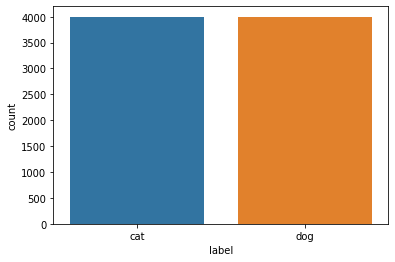

In [5]:
import seaborn as sns
sns.countplot(x="label",data=df)

# Read the images and covert it into list

In [6]:
import cv2
img = cv2.imread('10.png')
dimensions = img.shape

In [7]:
dimensions

(32, 32, 3)

In [8]:
import os

In [9]:
img_dir="D:\\ML cohert\\ML task\\train_data\\train_data"
ids = df["id"].tolist()
labels = df["label"].tolist()

In [10]:
imgs = []

for img in ids:
    imgs.append(cv2.imread(os.path.join(img_dir,f"{img}.png")))


In [11]:
len(imgs)

8000

In [15]:
imgs[0]

array([[[116, 125, 125],
        [ 91, 101, 110],
        [ 83,  90, 102],
        ...,
        [214, 207, 202],
        [212, 205, 200],
        [214, 208, 202]],

       [[142, 146, 142],
        [139, 144, 146],
        [170, 172, 176],
        ...,
        [205, 201, 195],
        [209, 205, 198],
        [215, 211, 204]],

       [[183, 185, 180],
        [146, 146, 143],
        [157, 157, 156],
        ...,
        [113, 111, 122],
        [131, 128, 139],
        [150, 147, 158]],

       ...,

       [[ 41,  82, 104],
        [ 39,  80, 101],
        [ 38,  81, 101],
        ...,
        [ 67, 103, 126],
        [ 69, 103, 126],
        [ 68, 101, 125]],

       [[ 40,  81, 104],
        [ 41,  84, 105],
        [ 43,  88, 109],
        ...,
        [ 78, 113, 138],
        [ 80, 113, 137],
        [ 81, 112, 137]],

       [[ 42,  83, 105],
        [ 45,  87, 108],
        [ 50,  94, 115],
        ...,
        [ 82, 117, 143],
        [ 84, 116, 143],
        [ 86, 116, 144]]

In [12]:
clf = ["cat","dog"]
target = []
for label in labels :
    if label == "cat":
        target.append(clf.index(label))
    elif label == "dog":
        target.append(clf.index(label))

In [18]:
import random

In [32]:
img_width=64
img_height = 64

# Below function prepares input data for our model

In [33]:
def prepare_data(images,target):
    inp= []

    for i in range(len(target)):
        images[i]=cv2.resize(images[i], (img_width,img_height), interpolation=cv2.INTER_CUBIC)
        inp.append([images[i], target[i]])

    random.shuffle(inp) 
    x = []  
    y = []  

    for feature, tar in inp:
        x.append(feature)
        y.append(tar)
    
    x= np.array(x)
    x = x/255
    y= np.array(y)
    
    return x,y

In [34]:
x, y = prepare_data(imgs,target)

In [35]:
x[0]

array([[[0.43137255, 0.55294118, 0.50980392],
        [0.42745098, 0.55686275, 0.51372549],
        [0.41568627, 0.56470588, 0.52156863],
        ...,
        [0.49803922, 0.61176471, 0.59215686],
        [0.43529412, 0.54901961, 0.52941176],
        [0.39215686, 0.50980392, 0.49019608]],

       [[0.41960784, 0.54901961, 0.50588235],
        [0.41568627, 0.55686275, 0.50980392],
        [0.40784314, 0.56862745, 0.52156863],
        ...,
        [0.54117647, 0.65490196, 0.63137255],
        [0.45490196, 0.57647059, 0.55686275],
        [0.40392157, 0.52941176, 0.50980392]],

       [[0.40392157, 0.54117647, 0.49411765],
        [0.4       , 0.55294118, 0.50588235],
        [0.39215686, 0.56862745, 0.51764706],
        ...,
        [0.60392157, 0.72156863, 0.70196078],
        [0.49019608, 0.62352941, 0.6       ],
        [0.41960784, 0.56078431, 0.5372549 ]],

       ...,

       [[0.77647059, 0.77254902, 0.77647059],
        [0.64313725, 0.65098039, 0.65098039],
        [0.42352941, 0

In [36]:
x[0].shape

(64, 64, 3)

# Build the model with the help of keras api

In [37]:
from keras import layers, models, optimizers

In [42]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [44]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
history=model.fit(x,y, epochs = 10, validation_split = 0.2, batch_size = 32)

Epoch 1/10
200/200 [==============================] - 14s 65ms/step - loss: 0.6946 - accuracy: 0.5124 - val_loss: 0.6716 - val_accuracy: 0.5994
Epoch 2/10
200/200 [==============================] - 13s 66ms/step - loss: 0.6597 - accuracy: 0.6132 - val_loss: 0.6009 - val_accuracy: 0.6650
Epoch 3/10
200/200 [==============================] - 14s 70ms/step - loss: 0.6235 - accuracy: 0.6479 - val_loss: 0.5792 - val_accuracy: 0.6919
Epoch 4/10
200/200 [==============================] - 14s 68ms/step - loss: 0.5875 - accuracy: 0.6903 - val_loss: 0.5767 - val_accuracy: 0.6794
Epoch 5/10
200/200 [==============================] - 14s 68ms/step - loss: 0.5563 - accuracy: 0.7093 - val_loss: 0.5884 - val_accuracy: 0.6875
Epoch 6/10
200/200 [==============================] - 14s 69ms/step - loss: 0.5283 - accuracy: 0.7373 - val_loss: 0.5177 - val_accuracy: 0.7337
Epoch 7/10
200/200 [==============================] - 14s 70ms/step - loss: 0.5014 - accuracy: 0.7535 - val_loss: 0.5144 - val_accuracy:

In [46]:
import matplotlib.pyplot as plt

# Plot the accuracy plot and see how model has trained during all epochs

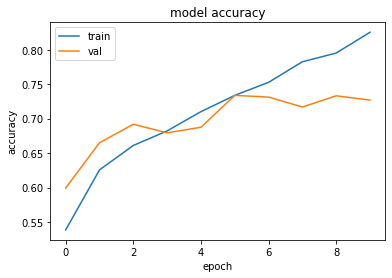

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Save th model in h5 file

In [48]:
model.save("my_h5_model.h5")